In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from os.path import dirname
import datetime as dt
from random import randint
from datetime import date
from pandas.api.types import CategoricalDtype

notebook_path = os.path.abspath("Notebook_Cedrik_FeatureEngineering.ipynb")
csv_path = os.path.join(os.path.dirname(dirname(notebook_path)), "data/ks-project-edited-datenexploration.csv")

In [3]:
df = pd.read_csv (csv_path, low_memory=False)
df_features = df
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,duration,year
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95,59,2015
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00,60,2017
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00,45,2013
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00,30,2012
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00,56,2015


# Anforderungen an Projektumsetzung: Feature Engineering

## Erstellen Sie mindestens zwei neue Features

### Encoding

In [4]:
# One-Hot Encoding für unser kategorischehs Feature state(failed, successful, canceled)
# Zunaechst werden die Zeilen mit den Werten suspended, undefined und live entfernt, 
# da diese wenig aussagekräftig sind für den Erfolg eines Projekts und nur einen kleinen Teil ausmachen
df_features.drop(df_features[(df.state == "suspended") | (df_features.state == "undefined") | (df_features.state == "live") | (df_features.country == 'N,0"')].index, inplace=True)
df_features = pd.concat([df_features.drop('state', axis=1), pd.get_dummies(df_features['state'])], axis=1)
df_features = pd.concat([df_features.drop('main_category', axis=1), pd.get_dummies(df_features['main_category'])], axis=1)
df_features = pd.concat([df_features.drop('category', axis=1), pd.get_dummies(df_features['category'])], axis=1)
df_features = pd.concat([df_features.drop('currency', axis=1), pd.get_dummies(df_features['currency'])], axis=1)
df_features = pd.concat([df_features.drop('country', axis=1), pd.get_dummies(df_features['country'])], axis=1)

In [5]:
df_features.head()

,ID,name,deadline,goal,launched,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real,...,IT,JP,LU,MX,NL,NO,NZ,SE,SG,US
0,1000002330,The Songs of Adelaide & Abullah,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,0,0.0,0.0,1533.95,...,0,0,0,0,0,0,0,0,0,0
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,15,100.0,2421.0,30000.00,...,0,0,0,0,0,0,0,0,0,1
2,1000004038,Where is Hank?,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,3,220.0,220.0,45000.00,...,0,0,0,0,0,0,0,0,0,1
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,1,1.0,1.0,5000.00,...,0,0,0,0,0,0,0,0,0,1
4,1000011046,Community Film Project: The Art of Neighborhoo...,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,14,1283.0,1283.0,19500.00,...,0,0,0,0,0,0,0,0,0,1


In [6]:
# Normalisierung der numerischen Werte
df_features['usd_pledged_real_scaled'] = (df_features['usd_pledged_real'] - df_features['usd_pledged_real'].min()) /\
                                         (df_features['usd_pledged_real'].max() - df_features['usd_pledged_real'].min())
df_features['usd_goal_real_scaled'] = (df_features['usd_goal_real'] - df_features['usd_goal_real'].min()) /\
                                      (df_features['usd_goal_real'].max() - df_features['usd_goal_real'].min())
df_features.drop(columns=["usd_pledged_real","usd_goal_real","usd pledged","pledged","goal"], inplace=True)
df_features.head()

,ID,name,deadline,launched,backers,duration,year,canceled,failed,successful,...,LU,MX,NL,NO,NZ,SE,SG,US,usd_pledged_real_scaled,usd_goal_real_scaled
0,1000002330,The Songs of Adelaide & Abullah,2015-10-09,2015-08-11 12:12:28,0,59,2015,0,1,0,...,0,0,0,0,0,0,0,0,0.000000e+00,0.000009
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,2017-11-01,2017-09-02 04:43:57,15,60,2017,0,1,0,...,0,0,0,0,0,0,0,1,1.190325e-04,0.000180
2,1000004038,Where is Hank?,2013-02-26,2013-01-12 00:20:50,3,45,2013,0,1,0,...,0,0,0,0,0,0,0,1,1.081666e-05,0.000270
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,2012-04-16,2012-03-17 03:24:11,1,30,2012,0,1,0,...,0,0,0,0,0,0,0,1,4.916666e-08,0.000030
4,1000011046,Community Film Project: The Art of Neighborhoo...,2015-08-29,2015-07-04 08:35:03,14,56,2015,1,0,0,...,0,0,0,0,0,0,0,1,6.308082e-05,0.000117


### Extration

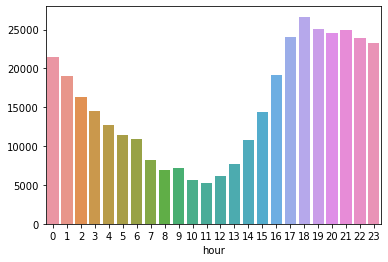

In [7]:
# Wir haben bereits mithilfe der Spalten launched und deadline 
# die Dauer der Projekte in Tagen ermittelt in der Spalte duration

# Die Wochentage ermitteln an dem die Projekte erstellt wurden
# Umwandeln von launche und deadline in Daten
df_features["launched"] = pd.to_datetime(df_features['launched'])
df_features["deadline"] = pd.to_datetime(df_features['deadline'])

# Extraktion der Stunde per dt-Accessor aus der Series
# Abspeichern in neuer Spalte
# Darstellung zu welcher Stunde wie viele Projekte gelaunched wurden
# Hier ist erkennbar das zwischen 16 Uhr und 0 Uhr die meisten Projekte erstellt werden
df_features['hour'] = df_features['launched'].dt.hour
launches_per_hour = df_features.groupby('hour').size()
sns.barplot(x = launches_per_hour.index, y = launches_per_hour.values)
plt.xticks(ticks=launches_per_hour.index, labels=launches_per_hour.index)
plt.show()

In [8]:
# Erzeuge 7 aufeinanderfolgende Tage (genaues Datum eigentlich egal)
oneweek = pd.DataFrame(index=pd.date_range(start=date(2021,1,1),periods=7, freq='D'))
oneweek['weekday'] = oneweek.index.weekday
oneweek['dayname'] = oneweek.index.day_name()
oneweek.sort_values('weekday', inplace=True)
ordered_daynames = oneweek['dayname'].values

dayname_type = CategoricalDtype(categories=ordered_daynames, ordered=True)

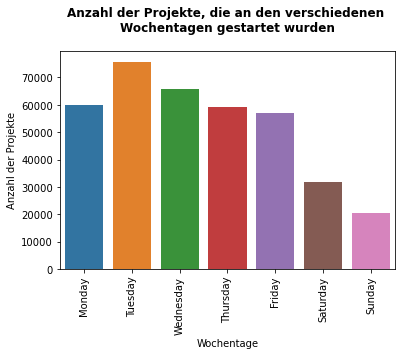

In [9]:
# Darstellung an welchen Wochentagen wie viele Projekte gelaunched wurden
# Hier ist erkennbar, dass am Samstag und Sonntag weniger Projekte gestartet werden als an den anderen Wochentagen
df_features['weekday_launched'] = df_features['launched'].dt.day_name().astype(dayname_type)
launches_per_weekday = df_features.groupby('weekday_launched').size()
sns.barplot(x=launches_per_weekday.index, y=launches_per_weekday.values)
plt.title("Anzahl der Projekte, die an den verschiedenen \nWochentagen gestartet wurden", pad=20, fontweight="bold")
plt.xlabel("Wochentage")
plt.ylabel("Anzahl der Projekte")
plt.xticks(rotation=90)
plt.show()

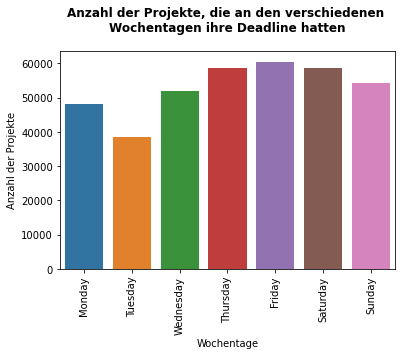

In [10]:
# Hier ist erkennbar, dass es relativ ausgeglichen ist, wann die verschiedenen Projekte ihre Deadline haben
df_features['weekday_deadline'] = df_features['deadline'].dt.day_name().astype(dayname_type)
deadlines_per_weekday = df_features.groupby('weekday_deadline').size()
sns.barplot(x=deadlines_per_weekday.index, y=deadlines_per_weekday.values)
plt.title("Anzahl der Projekte, die an den verschiedenen \nWochentagen ihre Deadline hatten", pad=20, fontweight="bold")
plt.xlabel("Wochentage")
plt.ylabel("Anzahl der Projekte")
plt.xticks(rotation=90)
plt.show()

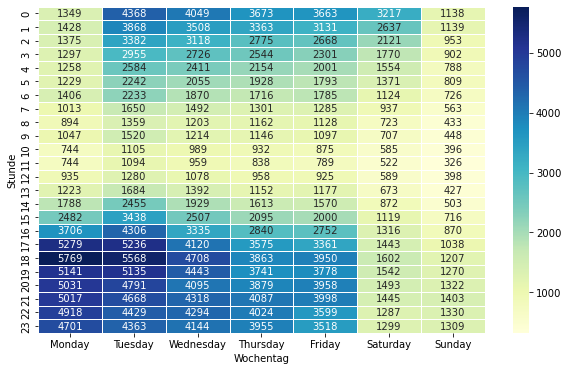

In [11]:
# Hier ist erkennbar, dass von Montag bis Freitag zwischen 16 und 0 Uhr die meisten Projekte erstellt wurden
weekday_hours = df_features.pivot_table(index='hour', columns='weekday_launched',
                                          values='ID', aggfunc='count', fill_value=0)
# Erstellen der Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(weekday_hours, annot=True, fmt="d", linewidths=.5,cmap="YlGnBu")
plt.xlabel("Wochentag")
plt.ylabel("Stunde")
plt.show()

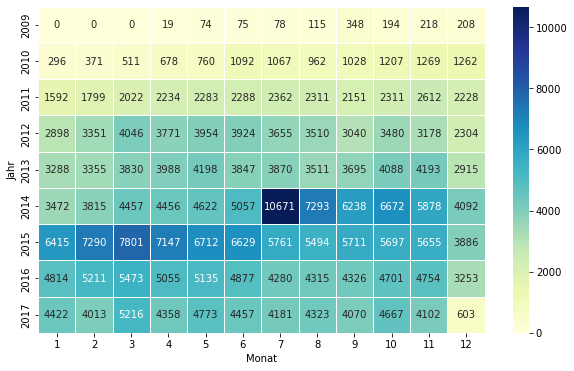

In [12]:
# Hier ist erkennbar, dass im Jahr 2015 am meisten Kickstarter Projekte erstellt wurden 
# und im Juli 2014 am meisten Projekte in einem Monat angemeldet wurden 
df_features.drop(df_features[(df_features.year == 1970) | (df_features.year == 2018)].index, inplace=True)

year_months = df_features.pivot_table(index=df_features['launched'].dt.year,
                                        columns=df_features['launched'].dt.month,
                                          values='ID', aggfunc='count', fill_value=0)
plt.figure(figsize=(10,6))
sns.heatmap(year_months, annot=True, fmt="d", linewidths=.5,cmap="YlGnBu")
plt.xlabel("Monat")
plt.ylabel("Jahr")
plt.show()

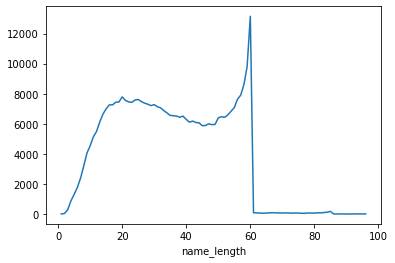

In [13]:
# Ermitteln wie viele Wörter in einem Titel enthalten sind
df_features["name_length"] = df_features["name"].str.len()

# Hier ist erkennbar, dass die meisten Projektnamen 60 Zeichen lang sind 
# und über 60 Zeichen sind fast keine Projektnamen lang
# Vor 2011 durften der Projektname länger als 60 Zeichen sein
df_features.groupby('name_length').size().plot()
plt.show()

In [14]:
df_features.loc[:,['backers','duration','usd_pledged_real_scaled','hour','name_length','usd_goal_real_scaled']].corr()

,backers,duration,usd_pledged_real_scaled,hour,name_length,usd_goal_real_scaled
backers,1.000000,-0.001702,0.753226,0.012132,0.019957,0.004725
duration,-0.001702,1.000000,0.006970,-0.018662,0.021764,0.022424
usd_pledged_real_scaled,0.753226,0.006970,1.000000,0.009703,0.028493,0.005832
hour,0.012132,-0.018662,0.009703,1.000000,-0.001475,0.001494
name_length,0.019957,0.021764,0.028493,-0.001475,1.000000,-0.004521
usd_goal_real_scaled,0.004725,0.022424,0.005832,0.001494,-0.004521,1.000000


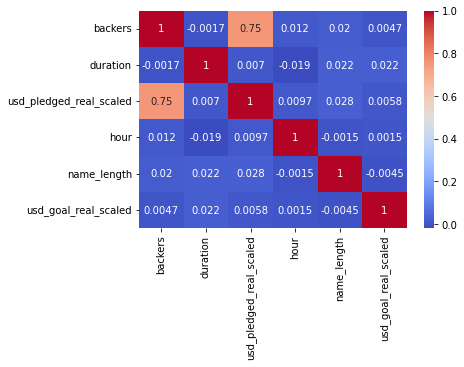

In [15]:
sns.heatmap(df_features.loc[:,['backers','duration','usd_pledged_real_scaled','hour','name_length','usd_goal_real_scaled']].corr(), annot = True, fmt='.2g',cmap= 'coolwarm')
plt.show()

<AxesSubplot:xlabel='backers', ylabel='usd_pledged_real'>

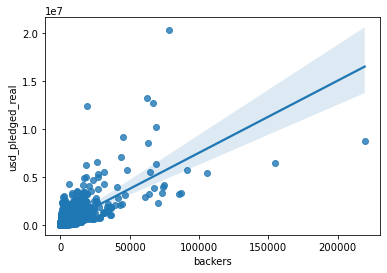

In [16]:
sns.regplot(x=df["backers"], y=df["usd_pledged_real"])

In [17]:
df_features.to_csv(os.path.join(os.path.dirname(dirname(notebook_path)), "data/ks-project-edited-features.csv"),index=False)